In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# import tensorflow.keras.backend.tensorflow_backend.set_session


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


# GPU
# config = tf.ConfigProto()
# config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
# config.gpu_options.per_process_gpu_memory_fraction = 0.3
# config.gpu_options.allow_growth = True


gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

session = tf.compat.v1.Session()
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

# GPU 自动分配显存
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# # GPU 显存限制
# tf.config.experimental.set_virtual_device_configuration(
#     gpus[0],
#     [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

# # GPU 模拟多GPU
# tf.config.experimental.set_virtual_device_configuration(
#     gpus[0],
#     [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048),
#      tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])


print(tf.__version__)
print('GPU available：',tf.test.is_gpu_available())

# load minist
# 离线下载，拷贝至 C:\Users\<user>\.keras\datasets\fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Close interactive session
2.0.0
GPU available： True


(60000, 28, 28)
(10000, 28, 28)
60000


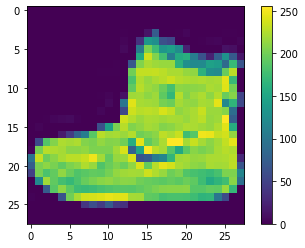

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [2]:
# mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape) # (60000, 28, 28)
print(test_images.shape) # (10000, 28, 28)
print(len(train_labels)) # 60000

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
with tf.device("GPU:0"):   
    model.fit(train_images, train_labels, 
                batch_size=1,
                epochs=10,
                shuffle=True,
                initial_epoch=0
                # workers=4,
                # use_multiprocessing=False
                )

# model.evaluate(test_images,  test_labels, verbose=2)